# 回归树（DecisionTreeRegressor）（波士顿房价数据）

## criterion

回归树衡量分枝质量的指标，支持标准有三种：

1）“mse”，均方误差

2）“friedman_mse”，费尔德曼均方误差

3）“mae”，绝对平均误差

**在回归树中，MSE不只是我们的分枝质量衡量指标，也是我们最常用的衡量回归树质量的指标。**<br>
**回归树的接口score返回的是R平方（决定系数=回归平方和/总平方和）（概率论中的回归平方和：回归平方和=总的平方和-残差平方和），并不是MSE。**<br>
**注：** 虽然均方误差永远为正，但是sklearn中使用均方误差作为评判标准的时候，却是计算“负均方误差”。

## 交叉验证

交叉验证是用来观察模型稳定性的一种方法，我们将数据划分为n份，依次使用其中一份作为测试集，其他n-1份作为训练集，多次计算模型的精确性来评估模型的平均准确程度。训练集和测试集的划分会干扰模型的结果，因此用交叉验证n次的结果求出的平均值，是对模型效果的一个更好的度量。

例如：k折交叉验证

**简单看一看回归树是怎样工作的：**

In [2]:
#交叉验证cross_val_score的用法
from sklearn.datasets import load_boston #波士顿房价数据
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [3]:
boston = load_boston()
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
regressor = DecisionTreeRegressor(random_state=0) #实例化
#交叉验证
#五个参数（第一个参数：任何一个算法模型，第二个参数：完整的数据集（特征矩阵），
#第三个参数：完整的标签，第四个参数：做10次或者说分为10份，
#第五个参数：用scoring后面的值这个模型来衡量我的交叉验证法的结果、评估这个模型）
cross_val_score(regressor,boston.data,boston.target,cv=10
               ,scoring = "neg_mean_squared_error"
               )

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

# 案例：一维回归的图像绘制

接下来在二维平面上来观察决策树是怎么拟合一条曲线的。我们用回归树来拟合正弦曲线，并且添加一些噪声来观察回归树的表现。

**1、导入需要的库**

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

**2、创建一条含有噪声的正弦曲线**

在这一步，基本思路是：先创建一组随机的，分布在0-5上的横坐标的取值（x），然后将这一组值放到sin函数中去生成纵坐标的值（y），接着再到y上去添加噪声。全程会使用numpy库来生成这个正弦曲线。

In [6]:
#用numpy来生成一个随机数种子，跟分类树中的random_state差不多
rng = np.random.RandomState(1)
#rng.rand(10)，生成0-1之间的10个数；rng.rand(2,3),生成2*3矩阵
#为什么要生成80*1的二维矩阵，因为训练集和测试集在训练时不能传入一维数组
#5*，，变成0-5之间的80个数
#np.sort排序，axis=0，y轴列
X = np.sort(5 * rng.rand(80,1),axis=0)

In [7]:
#用numpy中的正弦函数,此时y也是（80,1）
#ravel()降维，降维后(80,)
y = np.sin(X).ravel()

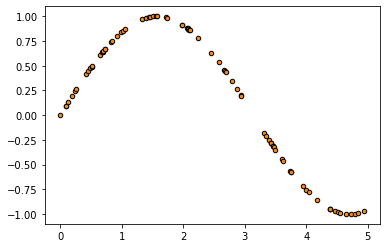

In [8]:
#先看一下图像
plt.figure()
plt.scatter(X,y,s=20,edgecolor="black",c="darkorange",label="data")

In [9]:
y[::5]  #取出16个数  80/5=16

array([ 5.71874056e-04,  2.47178482e-01,  4.89635918e-01,  6.45696215e-01,
        8.02397078e-01,  9.85824622e-01,  9.99977003e-01,  8.77830014e-01,
        8.60400242e-01,  4.45838347e-01,  1.93830272e-01, -2.86826010e-01,
       -4.43974821e-01, -7.20694771e-01, -9.48667092e-01, -9.97200340e-01])

In [10]:
#加上噪声
#y[行:列:步长]  y[::5]所有行所有列每5个取一个数，给这16个数随机的加上一个数
#rng.rand(16)：0-1之间  0.5-rng.rand(16)：-0.5-0.5之间  3*：扩大一点噪声：-1.5-1.5之间
y[::5] += 3 * (0.5 - rng.rand(16))

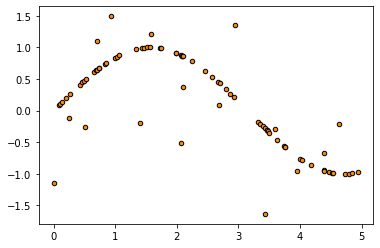

In [11]:
#再看一下加了噪声后的图像
plt.figure()
plt.scatter(X,y,s=20,edgecolor="black",c="darkorange",label="data")

In [12]:
#np.random.rand(数组结构)，生成随机数组的函数
#了解将为函数ravel()的用法（例子）
np.random.random((2,1))
np.random.random((2,1)).ravel()
np.random.random((2,1)).ravel().shape

(2,)

**3、实例化&训练模型**

In [13]:
#两个回归：测试在不同的拟合效果下回归树是怎样表现的
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

**4、测试集导入模型，预测结果**

In [11]:
np.arange(0.0,5.0,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [12]:
#增维的例子：
l = np.array([1,2,3,4])
l

array([1, 2, 3, 4])

In [13]:
l.shape

(4,)

In [14]:
l[:,np.newaxis] #判断一维二维：数方括号

array([[1],
       [2],
       [3],
       [4]])

In [18]:
l[:,np.newaxis].shape

(4, 1)

In [19]:
l[np.newaxis,:]

array([[1, 2, 3, 4]])

In [17]:
l[np.newaxis,:].shape

(1, 4)

In [14]:
#np.arange(开始点，结束点，步长) []后面是一种增维的用法（见上例子）
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]
X_test

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

In [15]:
#predict返回预测结果
y_1=regr_1.predict(X_test)
y_2=regr_2.predict(X_test)

In [18]:
regr_1.score(X_test,y_2)

0.8236028966126029

In [24]:
y_1

array([ 0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71

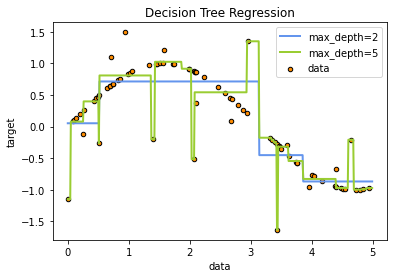

In [19]:
#绘制图像
plt.figure()
plt.scatter(X,y,s=20,edgecolor="black",c="darkorange",label="data")
plt.plot(X_test,y_1,color="cornflowerblue",label="max_depth=2",linewidth=2)
plt.plot(X_test,y_2,color="yellowgreen",label="max_depth=5",linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

可以看出绿色的线，最大深度为5，有一些过拟合了，蓝色的线基本上是跟着正弦曲线走的。